In [1]:
import sys
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
from greedy import *
from Generator import *

import torch
import matplotlib.pyplot as plt
from torch_geometric.utils import get_laplacian, to_dense_adj, from_networkx, to_networkx
import networkx as nx
import seaborn as sb
from scipy.linalg import solve_sylvester

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


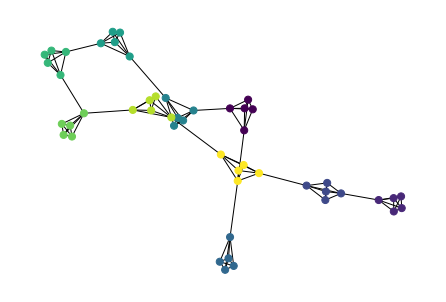

In [2]:
list_shapes = ['nx.complete_graph'] * 10
list_shapes_args = [[5]] * 10
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [10, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=50, std=0.1, save=False, root=False) 
random_node_features = torch.rand(G.number_of_nodes(), 50)

In [3]:
data = from_networkx(G)
L = to_dense_adj(get_laplacian(data.edge_index)[0], edge_attr=get_laplacian(data.edge_index)[1])[0]

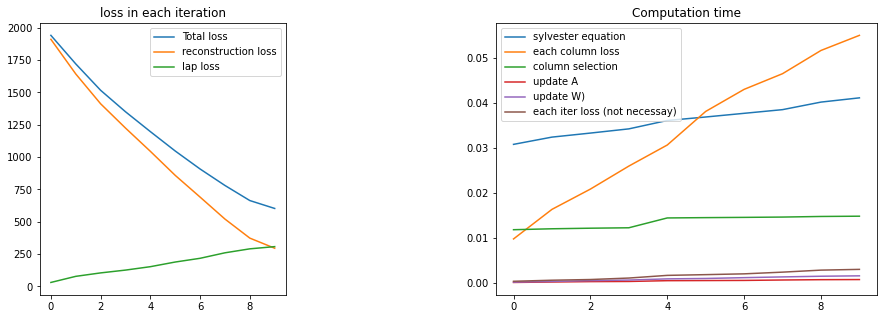

In [4]:
W, total_loss_rec, recon_loss_rec, lap_loss_rec, X_unselected_ind = greedy_lap(X=node_features, L=L, r=10, lambda1=1*G.number_of_nodes(), plot=True)

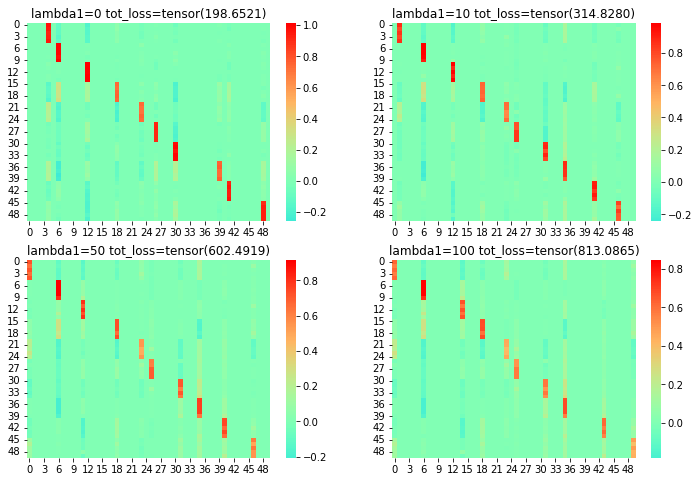

In [5]:
# orginal scale, node_feature
# more meaningful than constraint method
lambda1 = [0, 10, 50, 100]
num = len(lambda1)

f = plt.figure(figsize=(12,8))
for i in range(num):
    ax0 = f.add_subplot(eval('22'+str(i+1)))
    W, total_loss_rec, recon_loss_rec, lap_loss_rec, X_unselected_ind = greedy_lap(X=node_features, L=L, r=10, \
        lambda1=lambda1[i], plot=False)
    sb.heatmap(W, cmap='rainbow', center=0)
    loss = compute_loss(W, L*lambda1[i], node_features)
    ax0.set_title('lambda1='+str(lambda1[i])+' '+'tot_loss='+str(loss[0]))

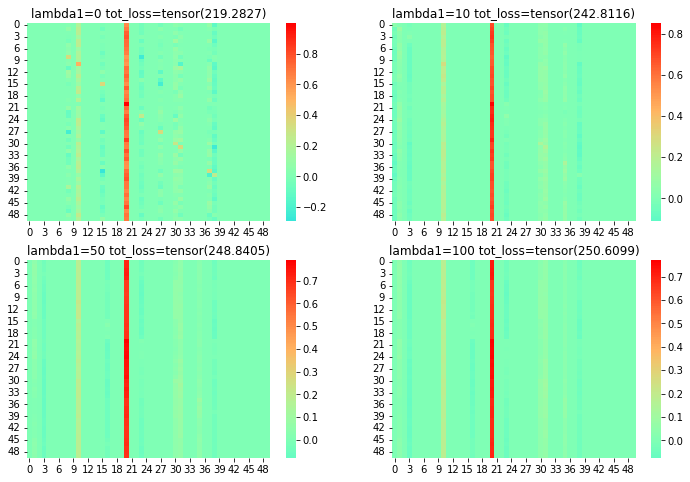

In [6]:
# orginal scale, node_feature
lambda1 = [0, 10, 50, 100]
num = len(lambda1)

f = plt.figure(figsize=(12,8))
for i in range(num):
    ax0 = f.add_subplot(eval('22'+str(i+1)))
    W, total_loss_rec, recon_loss_rec, lap_loss_rec, X_unselected_ind = greedy_lap(X=random_node_features, L=L, r=10, \
        lambda1=lambda1[i], plot=False)
    sb.heatmap(W, cmap='rainbow', center=0)
    loss = compute_loss(W, L*lambda1[i], random_node_features)
    ax0.set_title('lambda1='+str(lambda1[i])+' '+'tot_loss='+str(loss[0]))